In [3]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
import random

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
data1 = np.array([[random.randint(1,400) for i in range(2)]for j in range(50)],
                dtype= np.float64)
data2 = np.array([[random.randint(300,700) for i in range(2)]for j in range(50)],
                dtype= np.float64)
data3 = np.array([[random.randint(600,900) for i in range(2)]for j in range(50)],
                dtype= np.float64)

data = np.append(np.append(data1, data2, axis=0), data3, axis=0)

In [7]:
data.shape

(150, 2)

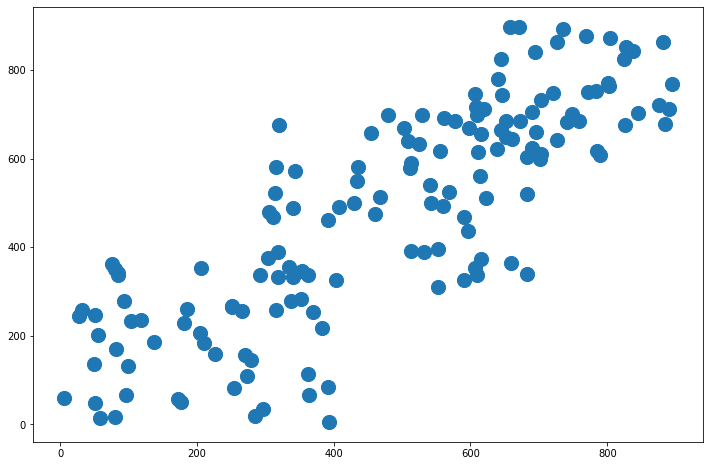

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], s=200)

In [10]:
label1 = np.array([0 for i in range(50)])
label2 = np.array([1 for i in range(50)])
label3 = np.array([2 for i in range(50)])

labels = np.append(np.append(label1, label2, axis=0), label3, axis=0)

In [11]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df = pd.DataFrame({'data_x': data[:,0],
                   'data_y': data[:,1],
                   'labels': labels})

df.sample(10)

,data_x,data_y,labels
142,875.0,721.0,2
27,383.0,218.0,0
55,430.0,499.0,1
96,623.0,510.0,1
20,28.0,244.0,0
101,683.0,603.0,2
102,721.0,748.0,2
38,99.0,132.0,0
72,454.0,657.0,1
52,529.0,698.0,1


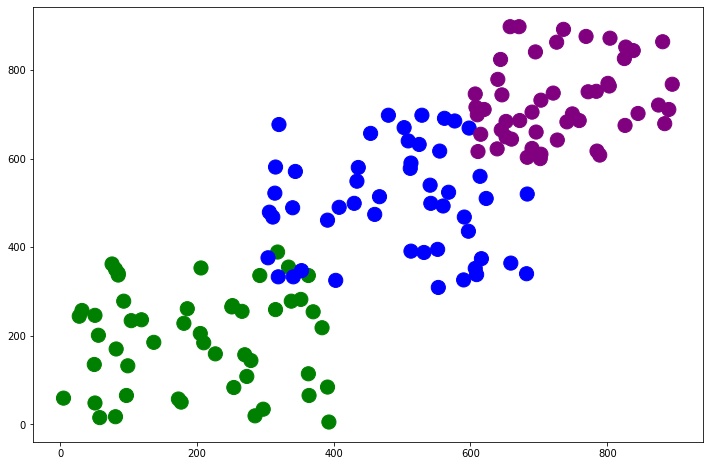

In [13]:
colors = ['green', 'blue', 'purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'], df['data_y'],
            c= df['labels'],
            s= 200,
            cmap= matplotlib.colors.ListedColormap(colors))

In [18]:
kmeans_model = KMeans(n_clusters= 3, max_iter= 10000).fit(data)

In [19]:
kmeans_model.labels_

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
centroids = kmeans_model.cluster_centers_
centroids

array([[474.29787234, 478.80851064],
       [716.6       , 722.54545455],
       [194.625     , 186.875     ]])

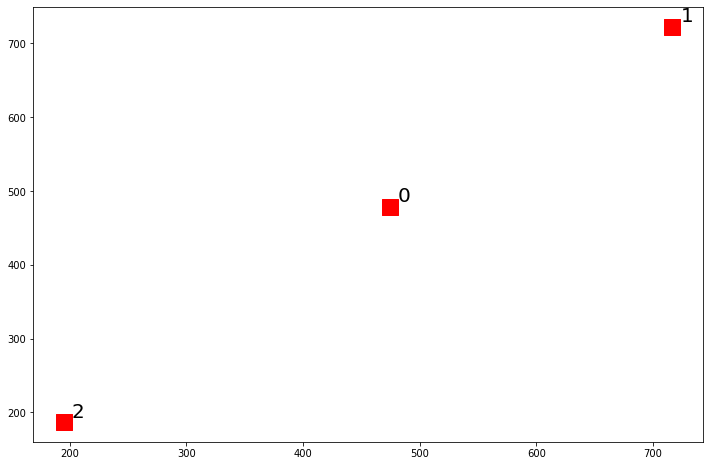

In [22]:
fig, ax= plt.subplots(figsize=(12,8))
plt.scatter(centroids[:,0], centroids[:,1],
            c= 'r',
            s=250,
            marker= 's')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] +7),
                 fontsize= 20)

In [24]:
print("homogeneity score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))
print("completeness score: ", metrics.completeness_score(labels, kmeans_model.labels_))
print("v_measure score: ", metrics.v_measure_score(labels, kmeans_model.labels_))
print("adjusted rand score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))
print("adjusted mutual info score: ", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))
print("silhouette score: ", metrics.silhouette_score(data, kmeans_model.labels_))

homogeneity score:  0.8011281841196807
completeness score:  0.8029527515488697
v_measure score:  0.8020394301539968
adjusted rand score:  0.8301409434364763
adjusted mutual info score:  0.7995588672898646
silhouette score:  0.46312501646285775


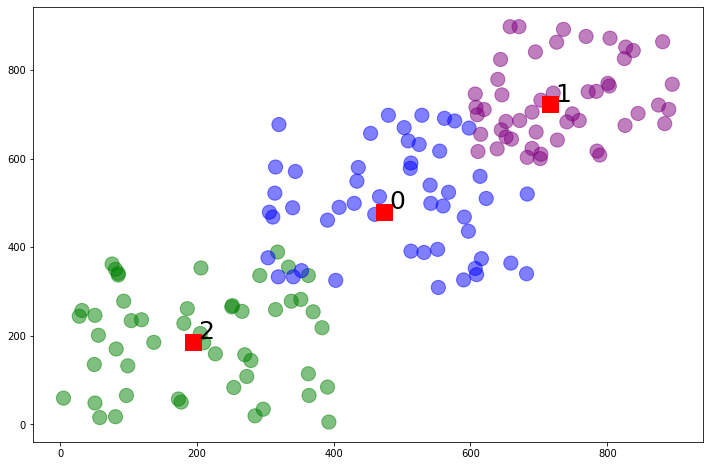

In [27]:
colors = ['green', 'blue', 'purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'], df['data_y'],
            c= df['labels'],
            s= 200,
            cmap= matplotlib.colors.ListedColormap(colors),
            alpha= 0.5)
plt.scatter(centroids[:,0], centroids[:,1],
            c= 'r',
            s=250,
            marker= 's')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] +7),
                 fontsize= 25)


In [28]:
data_test = np.array([[442., 621.],
                     [50., 153.],
                     [333., 373.],
                     [835., 816.]])

In [30]:
label_pred = kmeans_model.predict(data_test)
label_pred

array([0, 2, 0, 1], dtype=int32)

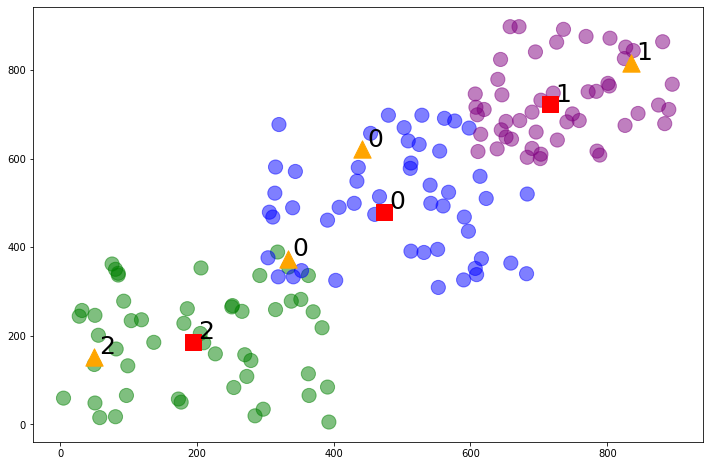

In [31]:
colors = ['green', 'blue', 'purple']
plt.figure(figsize=(12,8))

plt.scatter(df['data_x'], df['data_y'],
            c= df['labels'],
            s= 200,
            cmap= matplotlib.colors.ListedColormap(colors),
            alpha= 0.5)
plt.scatter(data_test[:,0], data_test[:,1],
            c= 'orange',
            s= 300,
            marker= '^')
for i in range(len(label_pred)):
    plt.annotate(label_pred[i], 
                 (data_test[i][0] +7, data_test[i][1] +7),
                 fontsize= 25)

plt.scatter(centroids[:,0], centroids[:,1],
            c= 'r',
            s=250,
            marker= 's')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] +7),
                 fontsize= 25)
